In [1]:
from qiskit import IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

#Earlier IBMQ.save_account('TOKEN') needs to be run
IBMQ.load_accounts()

In [41]:
IBMQ.backends(operational=True, simulator=False)

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>]

In [13]:
IBMQ.get_backend('ibmqx4').status()

BackendStatus(backend_name='ibmqx4', backend_version='1.0.0', operational=True, pending_jobs=1, status_msg='active')

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

In [3]:
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)

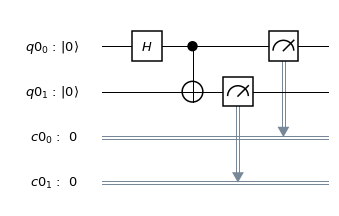

In [33]:
%matplotlib inline
circuit.draw(output='mpl')

In [34]:
print(circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
h q0[0];
cx q0[0],q0[1];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];



In [4]:
backend=IBMQ.get_backend('ibmqx4')

In [19]:
job = execute(circuit, backend=backend, shots=1024, max_credits=3)

In [ ]:
job_monitor(job, interval=5)

In [37]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [39]:
result = job.result()
counts=result.get_counts(circuit)
print(counts)

{'01': 192, '00': 506, '11': 279, '10': 47}


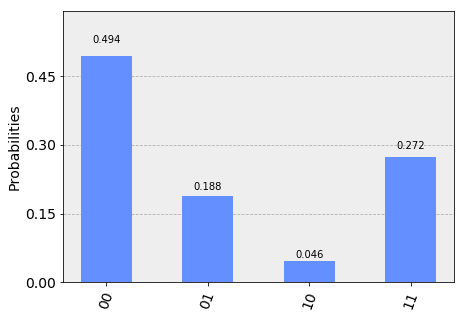

In [40]:
from qiskit.tools.visualization import plot_histogram
%matplotlib inline
plot_histogram(counts)

In [84]:
# depth of circuit (number of ops on the critical path)
circuit.depth()

3

In [27]:
import pprint
pprint.pprint(backend.configuration().coupling_map)

[[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]]


In [37]:
pprint.pprint(backend.configuration().basis_gates)

['u1', 'u2', 'u3', 'cx', 'id']


In [30]:
pprint.pprint(dictionary.gates)

[GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='id', parameters=[], qasm_def='gate id q { U(0,0,0) q; }'),
 GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u1', parameters=['lambda'], qasm_def='gate u1(lambda) q { U(0,0,lambda) q; }'),
 GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u2', parameters=['phi', 'lambda'], qasm_def='gate u2(phi,lambda) q { U(pi/2,phi,lambda) q; }'),
 GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u3', parameters=['theta', 'phi', 'lambda'], qasm_def='u3(theta,phi,lambda) q { U(theta,phi,lambda) q; }'),
 GateConfig(coupling_map=[[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]], name='cx', parameters=[], qasm_def='gate cx q1,q2 { CX q1,q2; }')]


In [26]:
import pprint
pprint.pprint(dictionary.coupling_map)

[[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]]


In [35]:
from qiskit import compile
qobj = compile(circuit, backend)

print(qobj)

Qobj(config=QobjConfig(max_credits=10, memory=False, memory_slots=2, n_qubits=5, shots=1024), experiments=[QobjExperiment(config=QobjItem(memory_slots=2, n_qubits=5), header=QobjItem(clbit_labels=[['c0', 0], ['c0', 1]], compiled_circuit_qasm='OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[5];\ncreg c0[2];\nu2(0,pi) q[1];\ncx q[1],q[0];\nu2(0,pi) q[1];\nu2(0,pi) q[0];\nbarrier q[0],q[1];\nmeasure q[1] -> c0[1];\nmeasure q[0] -> c0[0];\n', creg_sizes=[['c0', 2]], memory_slots=2, n_qubits=5, name='circuit0', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), instructions=[QobjItem(memory=[], name='u2', params=[0, 3.14159265358979], qubits=[1], texparams=['0', '\\pi']), QobjItem(memory=[], name='cx', params=[], qubits=[1, 0], texparams=[]), QobjItem(memory=[], name='u2', params=[0, 3.14159265358979], qubits=[0], texparams=['0', '\\pi']), QobjItem(memory=[], name='u2', params=[0, 3.14159265358979], qubits=[1], texparams=['0', '\\pi']), QobjItem(memory=[],

In [53]:
pprint.pprint(qobj.experiments[0].header.compiled_circuit_qasm)

('OPENQASM 2.0;\n'
 'include "qelib1.inc";\n'
 'qreg q[5];\n'
 'creg c0[2];\n'
 'u2(0,pi) q[1];\n'
 'cx q[1],q[0];\n'
 'u2(0,pi) q[1];\n'
 'u2(0,pi) q[0];\n'
 'barrier q[0],q[1];\n'
 'measure q[1] -> c0[1];\n'
 'measure q[0] -> c0[0];\n')


In [73]:
circuit2=QuantumCircuit.
    from_qasm_str(qobj.experiments[0].header.compiled_circuit_qasm)
circuit2.draw()

{'u2': 3, 'cx': 1, 'barrier': 1, 'measure': 2}

In [81]:
circuit2.draw()

In [82]:
circuit2.depth()

5

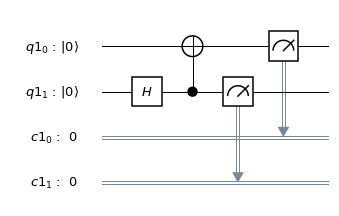

In [22]:
qr3 = QuantumRegister(2)
cr3 = ClassicalRegister(2)

circuit3 = QuantumCircuit(qr3, cr3)

circuit3.h(qr3[1])
circuit3.cx(qr3[1], qr3[0])
circuit3.measure(qr3, cr3)

%matplotlib inline
circuit3.draw(output='mpl')

In [23]:
job3 = execute(circuit3, backend=backend, shots=1024, max_credits=3)

In [26]:
job3.status()

<JobStatus.DONE: 'job has successfully run'>

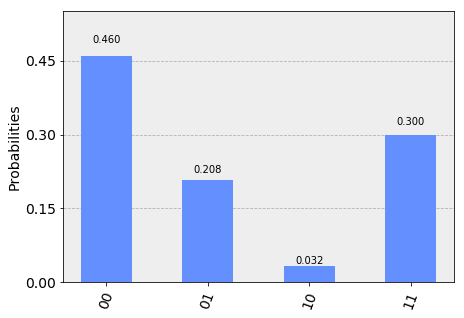

In [27]:
result3 = job3.result()
counts3=result3.get_counts(circuit3)

%matplotlib inline
plot_histogram(counts3)

In [15]:
qobj3 = compile(circuit3, backend)
pprint.pprint(qobj3.experiments[0].header.compiled_circuit_qasm)

('OPENQASM 2.0;\n'
 'include "qelib1.inc";\n'
 'qreg q[5];\n'
 'creg c0[2];\n'
 'u2(0,pi) q[1];\n'
 'cx q[1],q[0];\n'
 'barrier q[0],q[1];\n'
 'measure q[1] -> c0[1];\n'
 'measure q[0] -> c0[0];\n')


In [19]:
circuit3.depth()

3

In [20]:
circuit4=QuantumCircuit.from_qasm_str(qobj3.experiments[0].header.compiled_circuit_qasm)
circuit4.draw()

In [17]:
backend_monitor(backend)

ibmqx4
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 0
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    memory: True
    description: 5 qubit device
    online_date: 2018-11-06T05:00:00+00:00
    max_shots: 8192
    credits_required: True
    backend_name: ibmqx4
    allow_q_object: True
    url: None
    max_experiments: 75
    coupling_map: [[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]]
    conditional: False
    open_pulse: False
    n_registers: 1
    backend_version: 1.0.0
    sample_name: raven

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.2465 GHz / 38.67278 µs / 12.88365 µs / 0.0 / 0.00129 / 0.00258 / 0.08975
    Q1 / 5.2983 GHz / 40.93179 µs / 11.41149 µs / 0.0 / 0.00163 / 0.00326 / 0.069
    Q2 / 5.33833 GHz / 57.53154 µs / 47.80225 µs / 0.0 / 0.00112 / 0.00223 / 0.

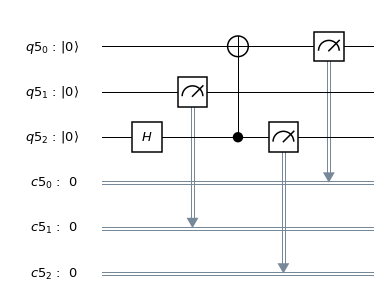

In [31]:
qr5 = QuantumRegister(3)
cr5 = ClassicalRegister(3)

circuit5 = QuantumCircuit(qr5, cr5)

circuit5.h(qr5[2])
circuit5.cx(qr5[2], qr5[0])
circuit5.measure(qr5, cr5)

%matplotlib inline
circuit5.draw(output='mpl')

In [32]:
job5 = execute(circuit5, backend=backend, shots=1024, max_credits=3)

In [34]:
job5.status()

<JobStatus.DONE: 'job has successfully run'>

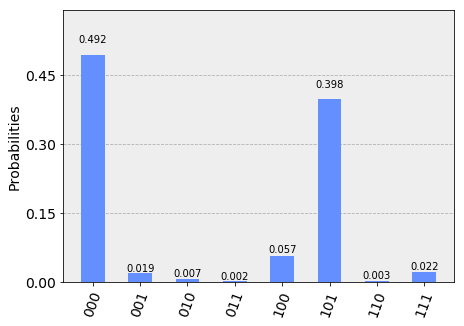

In [35]:
result5 = job5.result()
counts5=result5.get_counts(circuit5)

plot_histogram(counts5)

In [38]:
from qiskit.tools.monitor import backend_overview
backend_overview()

ibmq_16_melbourne           ibmqx2                       ibmqx4
-----------------           ------                       ------
Num. Qubits:  14            Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0             Pending Jobs: 8              Pending Jobs: 62
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operational:  True           Operational:  True
Avg. T1:      59.3          Avg. T1:      51.8           Avg. T1:      42.4
Avg. T2:      80.6          Avg. T2:      45.4           Avg. T2:      24.5





#### Hmmm, it seems nobody is using the ibmqx4...indeed the T1 and T2 times are worse than for ibmqx2 amd melbourne...

In [21]:
backend_monitor(IBMQ.get_backend('ibmqx2'))

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 74
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    memory: True
    description: 5 qubit device
    online_date: 2018-11-06T05:00:00+00:00
    max_shots: 8192
    credits_required: True
    backend_name: ibmqx2
    allow_q_object: True
    url: None
    max_experiments: 75
    coupling_map: [[0, 1], [0, 2], [1, 2], [3, 2], [3, 4], [4, 2]]
    conditional: False
    open_pulse: False
    n_registers: 1
    backend_version: 1.0.0
    sample_name: sparrow

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.28638 GHz / 49.35988 µs / 46.3054 µs / 0.0 / 0.00438 / 0.00876 / 0.07075
    Q1 / 5.23823 GHz / 59.9895 µs / 57.14145 µs / 0.0 / 0.00309 / 0.00618 / 0.3085
    Q2 / 5.02998 GHz / 73.80225 µs / 61.83772 µs / 0.0 / 0.00756 / 0.01513 

In [36]:
IBMQ.backends(operational=True, simulator=False)

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>]

### Nope, won't be any better...